In [35]:
import pandas as pd
import numpy as np

<AxesSubplot:xlabel='year'>

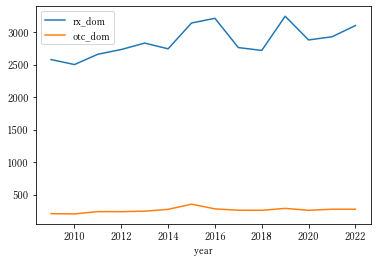

In [36]:
df=pd.read_csv("./merged/len3_ship_mon_Y_DN.csv",encoding="shift-jis",index_col=0)

#前処理
df.replace('-',"0",inplace=True)
df["otc_dom"].replace(",","",regex=True,inplace=True)
df["rx_dom"].replace(",","",regex=True,inplace=True)
df["stock_otc_lag"].replace(",","",regex=True,inplace=True)
df["stock_rx_lag"].replace(",","",regex=True,inplace=True)
# fillna
df["otc_dom"].fillna(0,inplace=True)
df["rx_dom"].fillna(0,inplace=True)
df["stock_otc_lag"].fillna(0,inplace=True)
df["stock_rx_lag"].fillna(0,inplace=True)
df["otc_dom"]=df["otc_dom"].astype(int)
df["rx_dom"]=df["rx_dom"].astype(int)
df["stock_otc_lag"]=df["stock_otc_lag"].astype(int)
df["stock_rx_lag"]=df["stock_rx_lag"].astype(float)
df=df.loc[df["otc_dom"]>0]
df=df.loc[df["rx_dom"]>0]
# df=df.loc[df["stock_otc_lag"]>0]
# df=df.loc[df["stock_rx_lag"]>0]
df=df.loc[df["generic_share_q"]>0]
# df[["rx_dom","otc_dom","self_dom"]].describe()
df[["rx_dom","otc_dom"]]=df[["rx_dom","otc_dom"]]/1e6
df.groupby("year").sum()[["rx_dom","otc_dom"]].plot()
# df.groupby("year").sum()[["otc_dom","self_dom"]].plot()
# df[["rx_dom","otc_dom"]].plot()

In [37]:
df.loc[df["self_dom"]>0]["self_dom"].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: self_dom, dtype: float64

In [38]:
df=pd.read_csv("./merged/len3_ship_DN.csv",encoding="shift-jis",index_col=0)
#前処理
df.replace('-',"0",inplace=True)
df["otc_dom"].replace(",","",regex=True,inplace=True)
df["rx_dom"].replace(",","",regex=True,inplace=True)
df["stock_otc_lag"].replace(",","",regex=True,inplace=True)
df["stock_rx_lag"].replace(",","",regex=True,inplace=True)
# fillna
df["otc_dom"].fillna(0,inplace=True)
df["rx_dom"].fillna(0,inplace=True)
df["stock_otc_lag"].fillna(0,inplace=True)
df["stock_rx_lag"].fillna(0,inplace=True)
df["otc_dom"]=df["otc_dom"].astype(int)
df["rx_dom"]=df["rx_dom"].astype(int)
df["stock_otc_lag"]=df["stock_otc_lag"].astype(int)
df["stock_rx_lag"]=df["stock_rx_lag"].astype(float)
df=df.loc[df["otc_dom"]>0]
df=df.loc[df["rx_dom"]>0]
# df=df.loc[df["stock_otc_lag"]>0]
# df=df.loc[df["stock_rx_lag"]>0]
df=df.loc[df["generic_share_q"]>0]
df[["rx_dom","otc_dom","self_dom"]]=df[["rx_dom","otc_dom","self_dom"]]/1e6
# df[["rx_dom","otc_dom"]].describe()

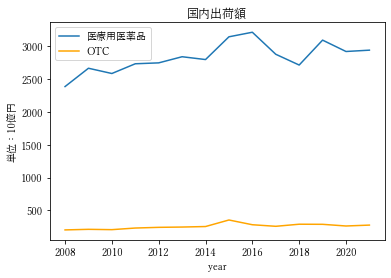

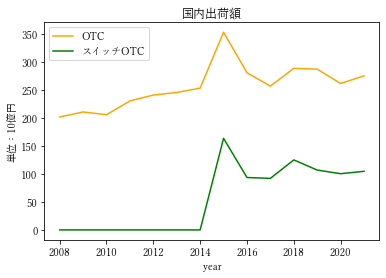

In [39]:
import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'yu mincho'}
matplotlib.rc('font', **font)
ax=df.groupby("year").sum()[["rx_dom","otc_dom"]].plot(color=["C0","orange"],ylabel="単位：10億円",title="国内出荷額")
ax.legend(["医療用医薬品","OTC"],loc="upper left")
plt.savefig("../estimate/event/plots/desc_rx_otc.png",dpi=300, transparent=False, facecolor="white")
ax2=df.groupby("year").sum()[["otc_dom","self_dom"]].plot(color=["orange","green"],ylabel="単位：10億円",title="国内出荷額")
ax2.legend(["OTC","スイッチOTC"],loc="upper left")
plt.savefig("../estimate/event/plots/desc_otc.png",dpi=300, transparent=False, facecolor="white")

In [40]:
# import sys
# sys.exit()
len(set(df["id"]))

21

In [41]:
df.loc[df["self_dom"]>0]["self_dom"].describe()

count    113.000000
mean       6.957551
std       14.906737
min        0.000469
25%        0.141605
50%        0.495190
75%        4.429304
max      103.468737
Name: self_dom, dtype: float64

In [42]:
df=pd.read_csv("./merged/len4_ndb_DN.csv",encoding="shift-jis",index_col=0)

In [43]:
df.columns
len(set(df["id"]))

32

In [44]:
df=df.loc[df["year"]>2014]
df["mean_price"]=df["revenue"]/df["総計"]
df[["総計","mean_price"]].describe()

,総計,mean_price
count,4.360000e+02,436.000000
mean,3.174177e+09,143.317480
std,6.870684e+09,392.741619
min,3.605813e+05,5.400000
25%,6.806452e+07,10.835614
50%,2.786511e+08,25.557643
75%,2.421159e+09,97.697571
max,3.766192e+10,2899.505261


In [45]:
df=pd.read_csv("./merged/len3_ndb_blp_DN_firm_FC.csv",encoding="utf-8-sig",index_col=0)
df=df.loc[df["総計"]>0]
df.columns

C:\Users\hakos\AppData\Local\Temp\ipykernel_26900\2847407326.py:1: DtypeWarning: Columns (118) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("./merged/len3_ndb_blp_DN_firm_FC.csv",encoding="utf-8-sig",index_col=0)


Index(['薬効分類', '薬効分類名称', '医薬品コード', '医薬品名', '薬価基準収載医薬品コード', '薬価', 'generic',
       '総計', 'year', 'in_hospital',
       ...
       'b', 'c', 'd', '_merge', 'wholesale_price', 'markup', 'oral_per',
       'brand', 'Pharmacopoeia', 'otc'],
      dtype='object', length=136)

In [46]:
df=df.loc[df["year"]>2014]
df["薬価"]=df["薬価"].astype(float)
df["総計"]=df["総計"].astype(float)/1e6/1e3
df[["総計","薬価"]].describe()

,総計,薬価
count,2.467300e+04,24673.000000
mean,1.333124e-02,357.346671
std,4.526902e-02,2079.828181
min,7.012987e-07,0.660000
25%,3.518760e-04,12.200000
50%,2.266922e-03,31.400000
75%,9.503580e-03,110.400000
max,9.541906e-01,80171.300000


In [47]:
df.columns

Index(['薬効分類', '薬効分類名称', '医薬品コード', '医薬品名', '薬価基準収載医薬品コード', '薬価', 'generic',
       '総計', 'year', 'in_hospital',
       ...
       'b', 'c', 'd', '_merge', 'wholesale_price', 'markup', 'oral_per',
       'brand', 'Pharmacopoeia', 'otc'],
      dtype='object', length=136)

In [48]:
# 1e9
df.groupby(["year","generic"]).sum()["総計"]

year  generic
2015  0.0        30.852636
      1.0        18.233005
2016  0.0        27.833543
      1.0        19.200605
2017  0.0        23.741180
      1.0        22.588640
2018  0.0        26.146664
      1.0        20.783022
2019  0.0        22.857372
      1.0        24.142900
2020  0.0        20.444493
      1.0        24.942634
2021  0.0        20.399243
      1.0        26.755715
Name: 総計, dtype: float64

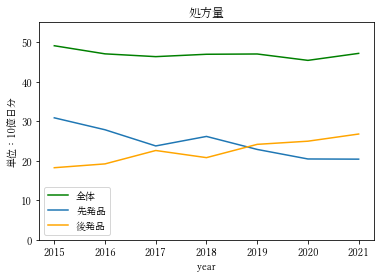

In [49]:
df["generic"]=df["generic"].astype(int)
ax=df.groupby(["year"]).sum()["総計"].plot(ylim=(0,5.5e1),color="green")
df.groupby(["year","generic"]).sum()["総計"].unstack().plot(ax=ax,ylim=(0,5.5e1),color=["C0","orange"])
ax.set_ylabel("単位：10億日分")
ax.set_title("処方量")
ax.legend(["全体","先発品","後発品"],loc="lower left")
plt.savefig("../estimate/event/plots/desc_ndb.png",dpi=300, transparent=False, facecolor="white")
